In [102]:
import time
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt
#loop if needed
Time = 100000
Ntime = Time + 1
time_s = np.linspace(0, Ntime, num=Ntime, endpoint=False)
array = np.random.rand(Ntime) 
rand_p1K=0.1*(array*2. - 1.)
data_p1K=20.+rand_p1K
rand_p1mK=1e-4*(array*2. - 1.)
data_p1mK=20.+rand_p1mK

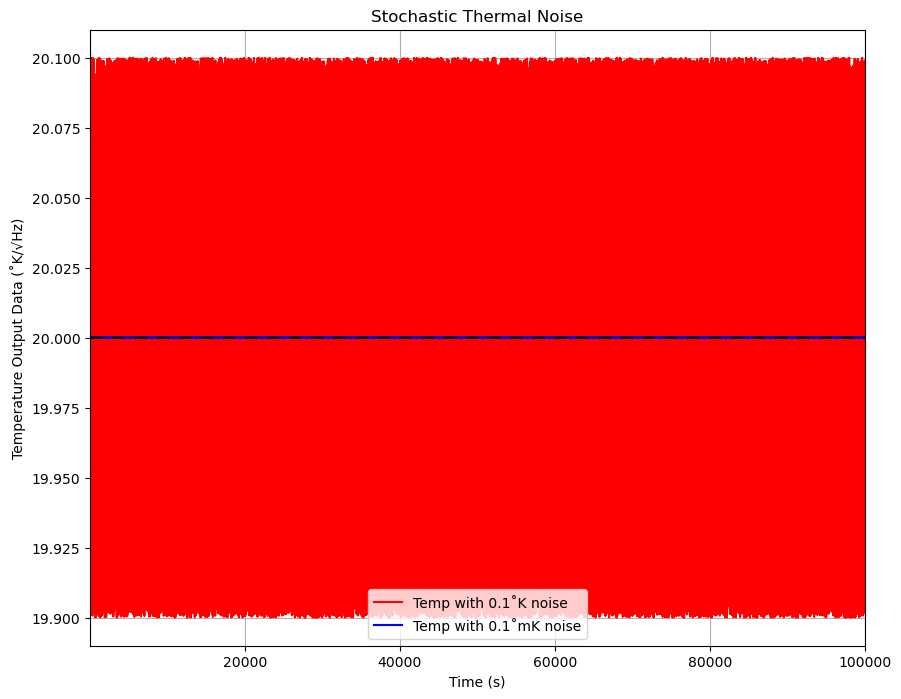

In [103]:
plt.figure(figsize=(10,8))
plt.plot(time_s, data_p1K, 'r-',label = "Temp with 0.1˚K noise")
plt.plot(time_s, data_p1mK, 'b-',label = "Temp with 0.1˚mK noise")
plt.xlim(1, Time)
plt.title("Stochastic Thermal Noise")
plt.xlabel("Time (s)")
plt.ylabel("Temperature Output Data (˚K/√Hz)")
plt.legend()
plt.plot(time_s,np.ones(np.shape(time_s))*20,'k-.')
plt.grid(visible=None, which='major', axis='both')
plt.show()

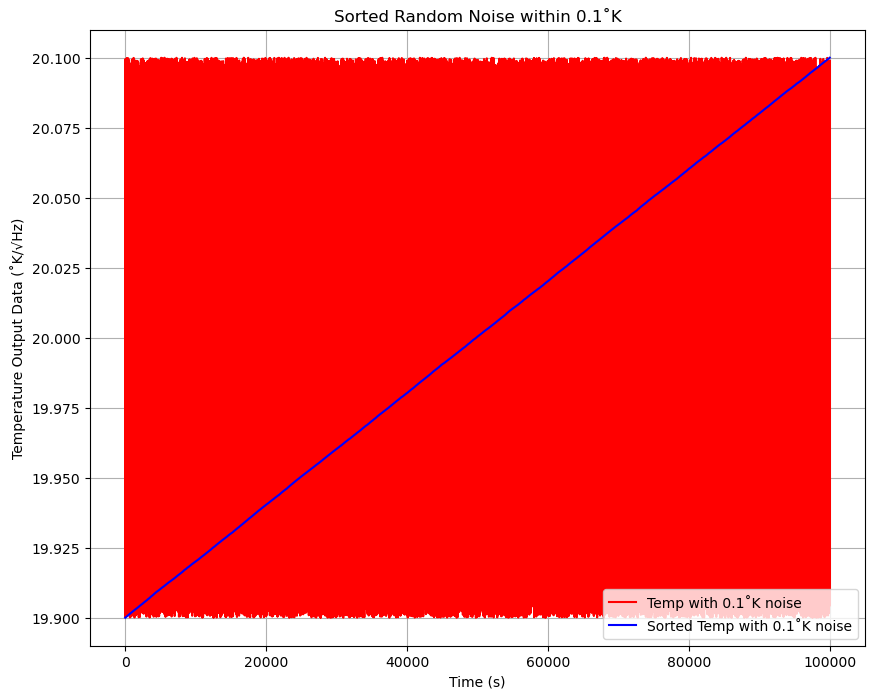

In [104]:
#Sort 0.1K data
ABp1K = np.abs(data_p1K)
SHp1K = np.sort(ABp1K)
plt.figure(figsize=(10,8))
plt.plot(time_s, ABp1K, 'r-',label = "Temp with 0.1˚K noise")
plt.plot(time_s, SHp1K, 'b-',label = "Sorted Temp with 0.1˚K noise")
plt.title("Sorted Random Noise within 0.1˚K")
plt.xlabel("Time (s)")
plt.ylabel("Temperature Output Data (˚K/√Hz)")
plt.grid('on')
plt.legend()

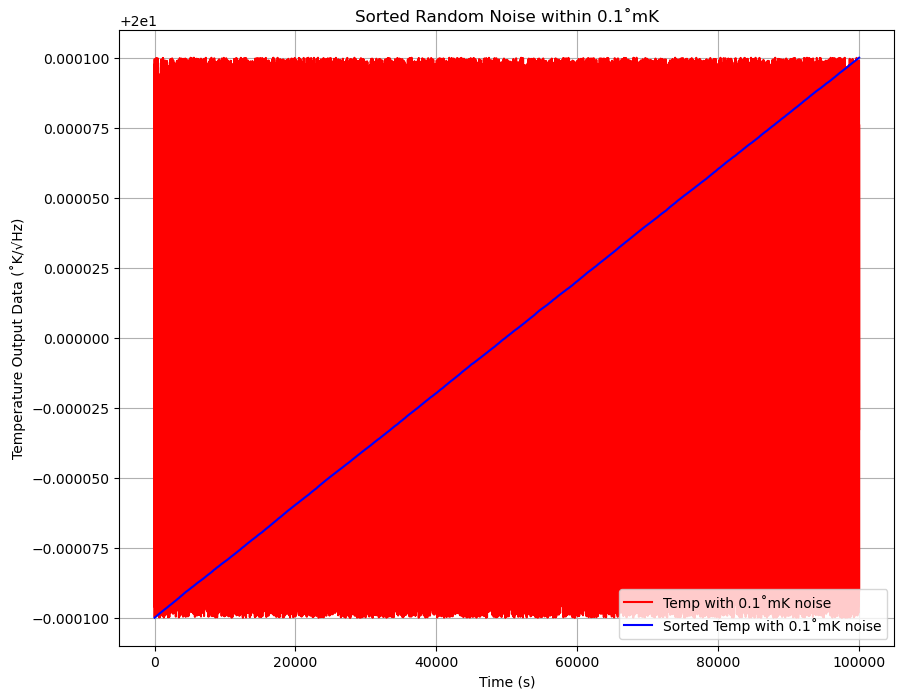

In [105]:
#Sort 0.1mK data
ABp1mK = np.abs(data_p1mK)
SHp1mK = np.sort(ABp1mK)
plt.figure(figsize=(10,8))
plt.plot(time_s, ABp1mK, 'r-',label = "Temp with 0.1˚mK noise")
plt.plot(time_s, SHp1mK, 'b-',label = "Sorted Temp with 0.1˚mK noise")
plt.title("Sorted Random Noise within 0.1˚mK")
plt.xlabel("Time (s)")
plt.ylabel("Temperature Output Data (˚K/√Hz)")
plt.grid('on')
plt.legend()

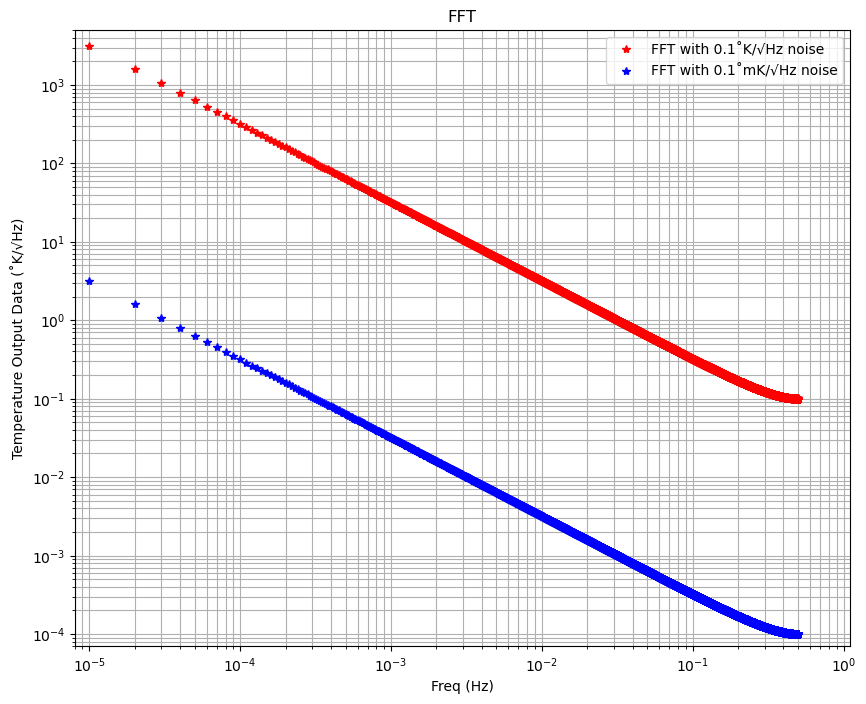

In [106]:
spectrum_p1K = np.fft.fft(SHp1K)
spectrum_p1mK = np.fft.fft(SHp1mK)
freq_p1K = np.fft.fftfreq(len(spectrum_p1K)) 
freq_p1mK = np.fft.fftfreq(len(spectrum_p1mK))
plt.figure(figsize=(10,8))
plt.plot(freq_p1K, abs(spectrum_p1K), 'r*',label = "FFT with 0.1˚K/√Hz noise")
plt.plot(freq_p1mK, abs(spectrum_p1mK), 'b*',label = "FFT with 0.1˚mK/√Hz noise")  
plt.yscale("log")
plt.xscale("log")
plt.xlim(8e-6, 1.1)
plt.ylim(7e-5, 5e3)
plt.title("FFT")
plt.xlabel("Freq (Hz)")
plt.ylabel("Temperature Output Data (˚K/√Hz)")
plt.legend()
plt.grid(visible=None, which='both', axis='both')
plt.show()

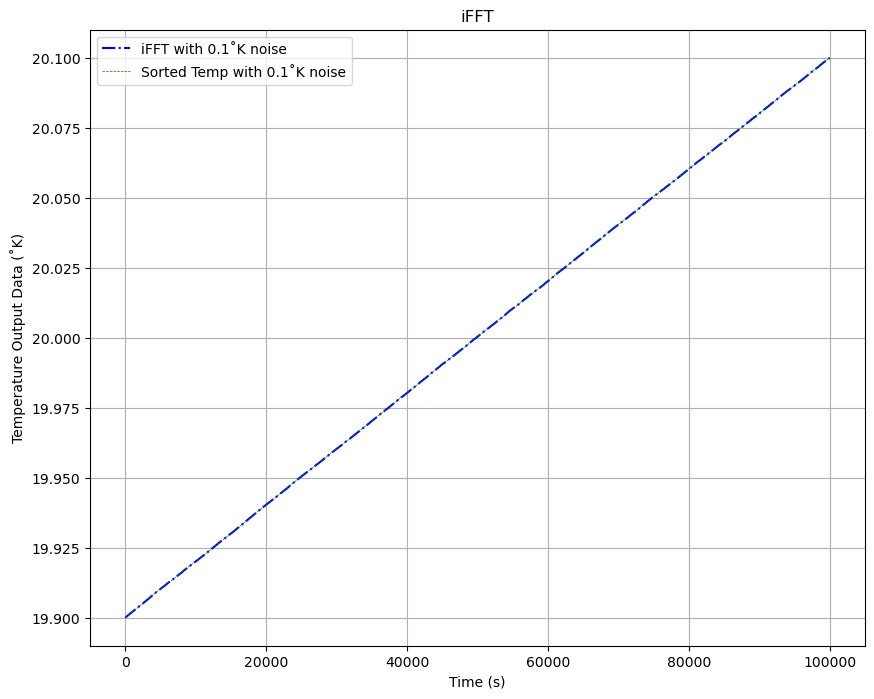

In [110]:
#Inverse FFT to restore sorted noise spectrum
iSHp1K = np.fft.ifft(spectrum_p1K)
#iTime_p1K = np.fft.fftfreq(len(iSHp1K)) 
plt.figure(figsize=(10,8))
#plt.plot(iTime_p1K, abs(iSHp1K), 'r*',label = "iFFT with 0.1˚K/√Hz noise")
plt.plot(time_s, abs(iSHp1K), 'b-.',label = "iFFT with 0.1˚K noise")
plt.plot(time_s, SHp1K, 'g--',label = "Sorted Temp with 0.1˚K noise", linewidth=0.5)
#plt.yscale("log")
#plt.xscale("log")
#plt.xlim(8e-6, 1.1)
#plt.ylim(7e-5, 5e3)
plt.title("iFFT")
plt.xlabel("Time (s)")
plt.ylabel("Temperature Output Data (˚K)")
plt.legend()
plt.grid(visible=None, which='both', axis='both')
plt.show()